<a href="https://colab.research.google.com/github/AhmedA245/Project-Heart-Failure-prediction/blob/main/Diabetes_vs_non_diabetes_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
project_id = 'heart-failure-project'

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
import pandas as pd

from google.cloud import bigquery

client = bigquery.Client(project='heart-failure-project')

df = client.query('''

SELECT *
  FROM
    `heart-failure-project.HeartFailureData.heart_raw`
  ''').to_dataframe()

In [ ]:
#df_to_bq = df_heart_failure_raw
#dataset_name = 'heart-failure-project.HeartFailureData'
#table_name = 'heart_failure_raw'
#project_id = 'heart-failure-project'
#pandas_gbq•to_gbq(df_heart_failure_raw, f'{dataset_name}.{table_name}', project_id=project_id)

In [ ]:
df.smoking

,smoking
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


# Importing necessary tools

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Visualise Diabetes and non-diabetic vs death occurence

In [ ]:
fig = px.bar(df, x="diabetes", y="DEATH_EVENT", color="diabetes")
fig.show()

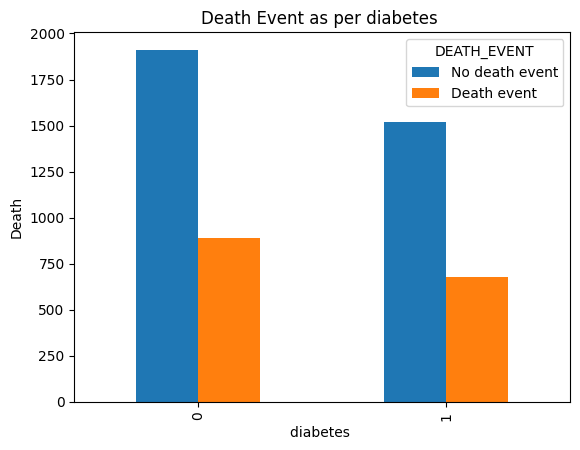

In [ ]:
pd.crosstab(df.diabetes ,df.DEATH_EVENT).plot(kind='bar')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['No death event', 'Death event'])
plt.title('Death Event as per diabetes ')
plt.xlabel('diabetes ')
plt.ylabel('Death')
plt.show()

In [ ]:
len_data = len(df)
len_smoker = len(df[df["smoking"]==0])
len_non_smoker = len_data - len_smoker

smoker_with_diabetes = len(df.loc[(df["diabetes"]==1) & (df['smoking']==0)])
smoker_without_diabetes = len_smoker - smoker_with_diabetes

non_smoker_with_diabetes = len(df.loc[(df["diabetes"]==1) & (df['smoking']==1)])
non_smoker_without_diabetes = len_smoker - non_smoker_with_diabetes
#print(smoker_with_diabetes,smoker_without_diabetes)
#print(non_smoker_with_diabetes,non_smoker_without_diabetes)

labels = ['smoker_diabetes','smoker_no_diabetes','non_smoker_diabetes','non_smoker_no_diabetes']
values = [smoker_with_diabetes, smoker_without_diabetes, non_smoker_with_diabetes, non_smoker_without_diabetes]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of No/diabetics according to smoking.")
fig.show()

In [ ]:
len_data = len(df)
len_w = len(df[df["sex"]==0])
len_m = len_data - len_w

men_with_diabetes = len(df.loc[(df["diabetes"]==1) & (df['sex']==0)])
men_without_diabetes = len_m - men_with_diabetes

women_with_diabetes = len(df.loc[(df["diabetes"]==1) & (df['sex']==1)])
women_without_diabetes = len_w - women_with_diabetes
#print(men_with_diabetes,men_without_diabetes)
#print(women_with_diabetes,women_without_diabetes)

labels = ['M_diabetes','M_no_diabete','W_diabete','W_no_diabete']
values = [men_with_diabetes, men_without_diabetes, women_with_diabetes, women_without_diabetes]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of No/diabetics according to their gender. (M for Men, W for Women)")
fig.show()

# Analysis

In [ ]:
df_diabetes = df[['diabetes', 'DEATH_EVENT']]
df_diabetes

,diabetes,DEATH_EVENT
0,1,0
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
4995,0,0
4996,0,0
4997,0,0
4998,0,0


In [ ]:
df_diabetes.corr(method='pearson')

,diabetes,DEATH_EVENT
diabetes,1.000000,-0.011273
DEATH_EVENT,-0.011273,1.000000


In [ ]:
df.creatinine_phosphokinase.describe()

,creatinine_phosphokinase
count,5000.0
mean,586.7606
std,976.733979
min,23.0
25%,121.0
50%,248.0
75%,582.0
max,7861.0


In [ ]:
fig = px.histogram(df, x="creatinine_phosphokinase", color="DEATH_EVENT",
                   barmode="overlay",
                   labels={"DEATH_EVENT": "Death Event", "creatinine_phosphokinase": "creatinine_phosphokinase"})
fig.show()

In [ ]:
df_CPK = df[['creatinine_phosphokinase', 'anaemia', 'DEATH_EVENT']]

In [ ]:
df_CPK.corr(method='spearman')

,creatinine_phosphokinase,anaemia,DEATH_EVENT
creatinine_phosphokinase,1.000000,-0.168460,0.046958
anaemia,-0.168460,1.000000,0.054508
DEATH_EVENT,0.046958,0.054508,1.000000


In [ ]:
fig9 = px.box(df, x="DEATH_EVENT", y="creatinine_phosphokinase",
             labels={"DEATH_EVENT": "Death Event", "creatinine_phosphokinase": "creatinine_phosphokinase"})
fig9.show()

In [ ]:
fig = px.box(df, x="DEATH_EVENT", y="creatinine_phosphokinase", color="DEATH_EVENT")
fig.show()

In [ ]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

<ipython-input-9-ae4f023a73f5>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-9-ae4f023a73f5>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-9-ae4f023a73f5>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eithe

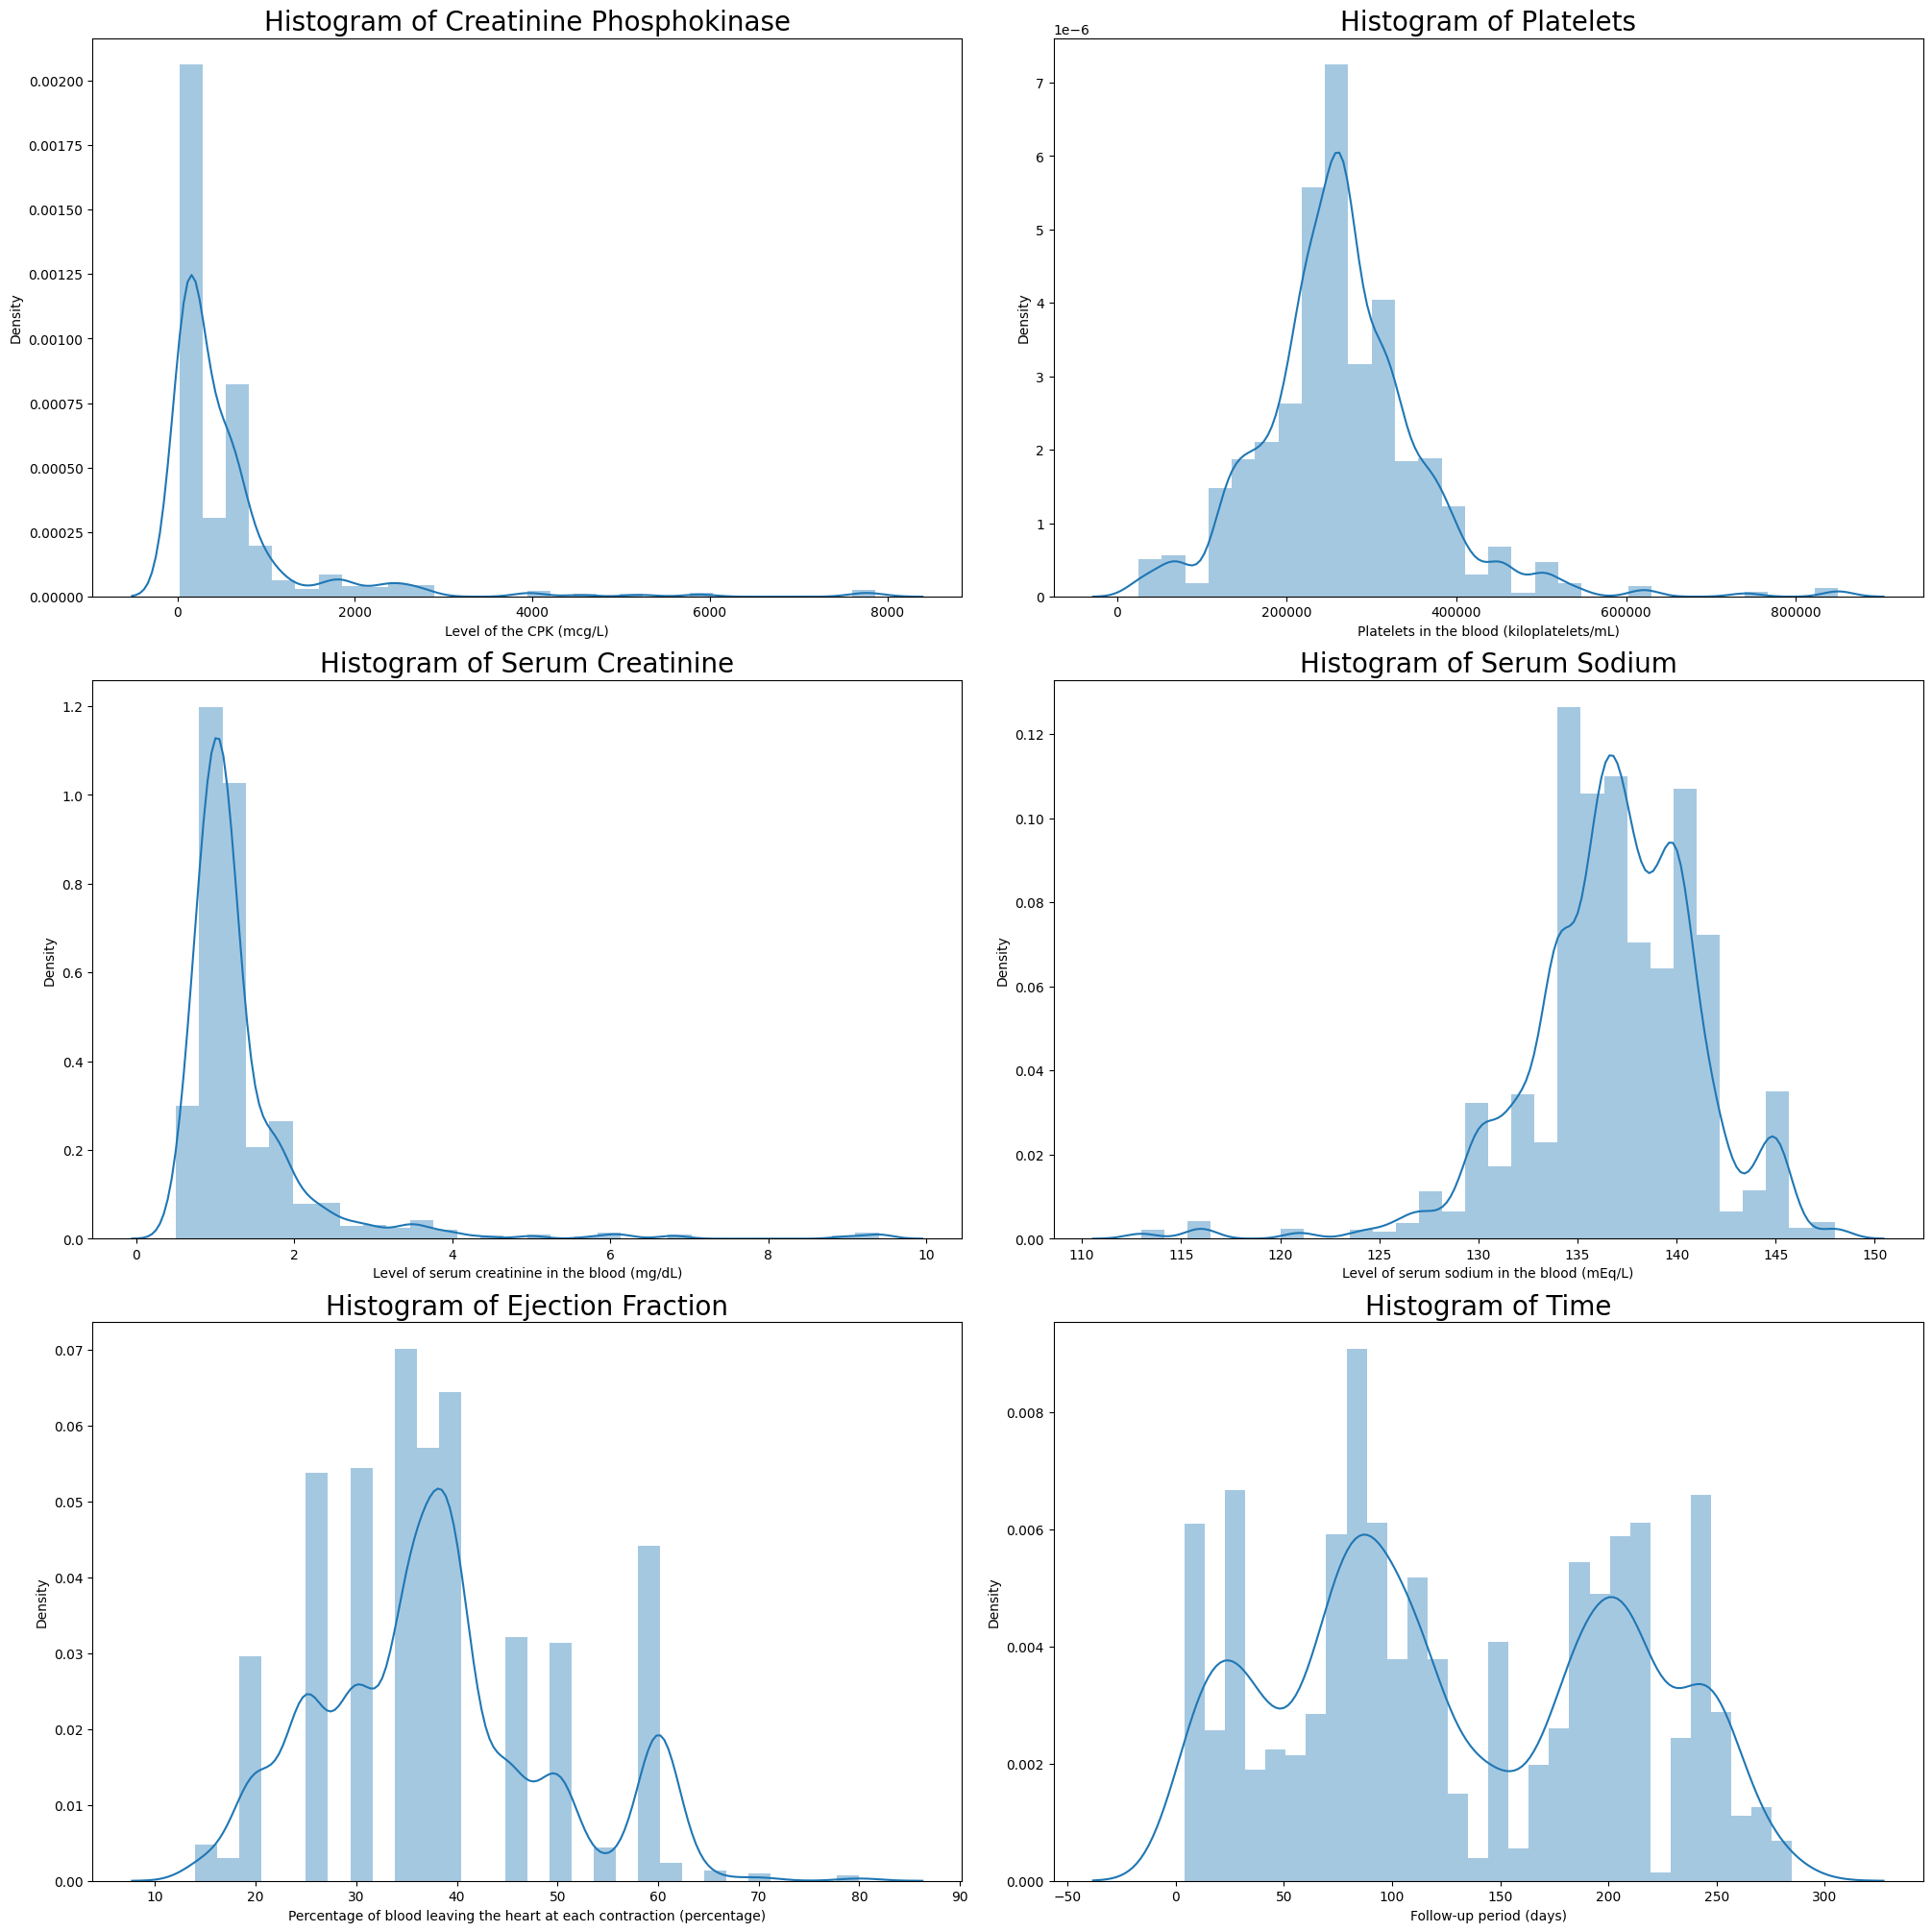

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(20,20),constrained_layout=True)
plot_hist(df.creatinine_phosphokinase,
          title='Creatinine Phosphokinase',
          xlabel="Level of the CPK (mcg/L)",
          ax=axes[0,0])
plot_hist(df.platelets,
          bins=30,
          title='Platelets',
          xlabel='Platelets in the blood (kiloplatelets/mL)',
          ax=axes[0,1])
plot_hist(df.serum_creatinine,
          title='Serum Creatinine',
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[1,0])
plot_hist(df.serum_sodium,
          bins=30,
          title='Serum Sodium',
          xlabel='Level of serum sodium in the blood (mEq/L)',
          ax=axes[1,1])
plot_hist(df.ejection_fraction,
          title='Ejection Fraction',
          xlabel='Percentage of blood leaving the heart at each contraction (percentage)',
          ax=axes[2,0])
plot_hist(df.time,
          bins=30,
          title='Time',
          xlabel='Follow-up period (days)',
          ax=axes[2,1])
plt.show()